In [ ]:
pip install sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load a pretrained embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Some example sentences
sentences = [
    "actor",
    "man",
    "woman",
    "actress",
]

# Generate embeddings (each is a vector ~384 dimensions)
embeddings = model.encode(sentences)
print(embeddings)

# Print shape
print("Embedding shape:", embeddings.shape)


[[-0.06602477  0.00599008 -0.02914593 ... -0.02342217  0.02989616
   0.03019371]
 [-0.10967565  0.04374183 -0.02631919 ... -0.06859675 -0.01288429
   0.00773402]
 [-0.04559173  0.01133463 -0.01911314 ... -0.0191477   0.09351272
   0.0011285 ]
 [-0.07664867 -0.05076869 -0.00786058 ... -0.04223571  0.0420435
   0.00968867]]
Embedding shape: (4, 384)


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load a pretrained embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Some example sentences
sentences = [
    "The Dog is playing",
    "The Dog is barking",
    "The Dog is falling",
    "The Dog is running",
]

# Generate embeddings (each is a vector ~384 dimensions)
embeddings = model.encode(sentences)
print(embeddings)

# Print shape
print("Embedding shape:", embeddings.shape)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[ 0.03131906 -0.0582269   0.0461462  ...  0.06981707  0.05988456
   0.08423799]
 [ 0.02825212 -0.01855707  0.04931723 ...  0.00944751  0.04318252
   0.04817751]
 [ 0.00400798 -0.01412927  0.06345554 ... -0.02020894  0.06412666
   0.07141028]
 [ 0.00804123  0.0003492   0.01742686 ...  0.01479285  0.06117814
   0.07585194]]
Embedding shape: (4, 384)


In [ ]:
from sentence_transformers import SentenceTransformer

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Access tokenizer
tokenizer = model.tokenizer

# Size of vocab
print("Vocab size:", len(tokenizer))

# First 50 tokens
print(tokenizer.get_vocab().keys())

sentences = list(tokenizer.get_vocab().keys())
embeddings = model.encode(sentences)



Vocab size: 30522
dict_keys(['garry', 'radical', '##imov', '##nco', 'speak', 'generates', 'branding', '##slin', '##stan', 'buchanan', 'knob', '##nham', 'si', 'libretto', 'golf', '2016', 'samsung', 'strife', '##ental', 'bypassed', 'meets', 'economy', 'adherence', 'disappears', 'zinc', '[unused563]', 'obedience', 'phoebe', '[unused346]', 'bad', 'sniff', 'contra', 'manufactured', 'longitude', '##ₛ', 'gliding', 'blink', 'offspring', 'flint', 'materials', 'faltered', 'tendency', 'gypsy', '##cs', 'device', '##aia', 'tent', 'model', 'sharing', 'hotter', 'upward', '##lices', '##nut', 'rpg', 'integration', 'hazard', 'admits', 'connor', '##ile', 'answered', '##ische', 'employer', 'morley', 'hammond', 'guys', 'mounting', '##cis', 'statutory', 'disused', 'homer', 'weighs', 'vibe', 'ri', 'playing', 'undergo', 'tequila', 'constantly', '1800', 'baghdad', 'depictions', 'thanked', '##28', 'س', 'pushes', '1880', 'olga', 'prospects', 'orchards', 'switched', 'yellow', 'allied', 'inorganic', '##さ', 'rhythm

KeyboardInterrupt: 

In [ ]:
# Compute cosine similarity between all pairs
similarity = util.cos_sim(embeddings, embeddings)

print("Cosine similarity matrix:\n", similarity)


Cosine similarity matrix:
 tensor([[1.0000, 0.5150, 0.6098, 0.7115],
        [0.5150, 1.0000, 0.3595, 0.4383],
        [0.6098, 0.3595, 1.0000, 0.5424],
        [0.7115, 0.4383, 0.5424, 1.0000]])


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


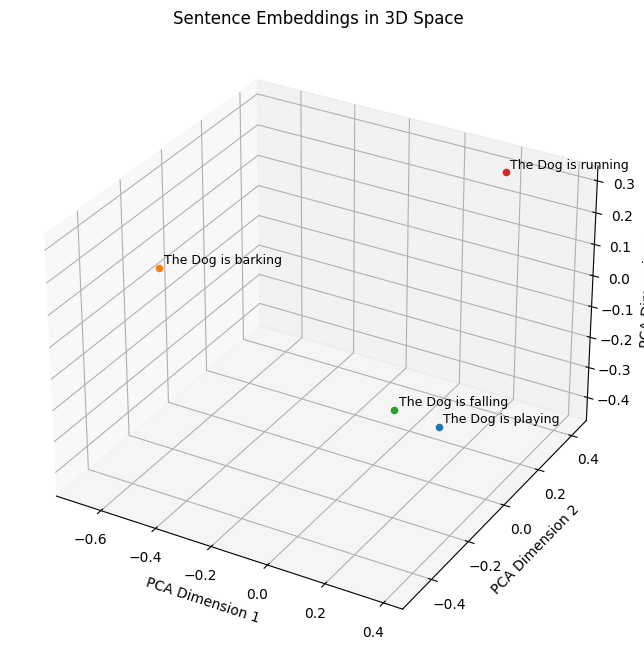

In [ ]:
# Reduce embeddings to 3D
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# Plot 3D scatter
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i, sentence in enumerate(sentences):
    x, y, z = embeddings_3d[i]
    ax.scatter(x, y, z, marker='o')
    ax.text(x+0.01, y+0.01, z+0.01, sentence, fontsize=9)

ax.set_title("Sentence Embeddings in 3D Space")
ax.set_xlabel("PCA Dimension 1")
ax.set_ylabel("PCA Dimension 2")
ax.set_zlabel("PCA Dimension 3")

plt.show()


In [ ]:
w1 = embeddings[0]
w2 = embeddings[1]
w3 = embeddings[2]
w4 = embeddings[3]

result_vec = w1-w2+w3

# Find the most similar word to the result vector
similarities = util.cos_sim(result_vec, embeddings)

# Get the index of the most similar sentence (excluding the result vector itself)
most_similar_index = similarities[0].argmax().item()

print(f"{sentences[most_similar_index]}")

The Dog is falling



Cosine Similarity Matrix:
                                 The dog was playing  The dog was barking  \
The dog was playing                            1.00                 0.52   
The dog was barking                            0.52                 1.00   
The dog was falling                            0.64                 0.45   
The dog was running                            0.69                 0.44   
The dog has been playing                       0.98                 0.46   
The dog has been barking                       0.56                 0.93   
The dog has been falling                       0.64                 0.35   
The dog has been running                       0.69                 0.39   
The puppy is playing                           0.78                 0.35   
The puppy is barking                           0.51                 0.79   
The puppy is falling                           0.52                 0.27   
The puppy is running                           0.55         

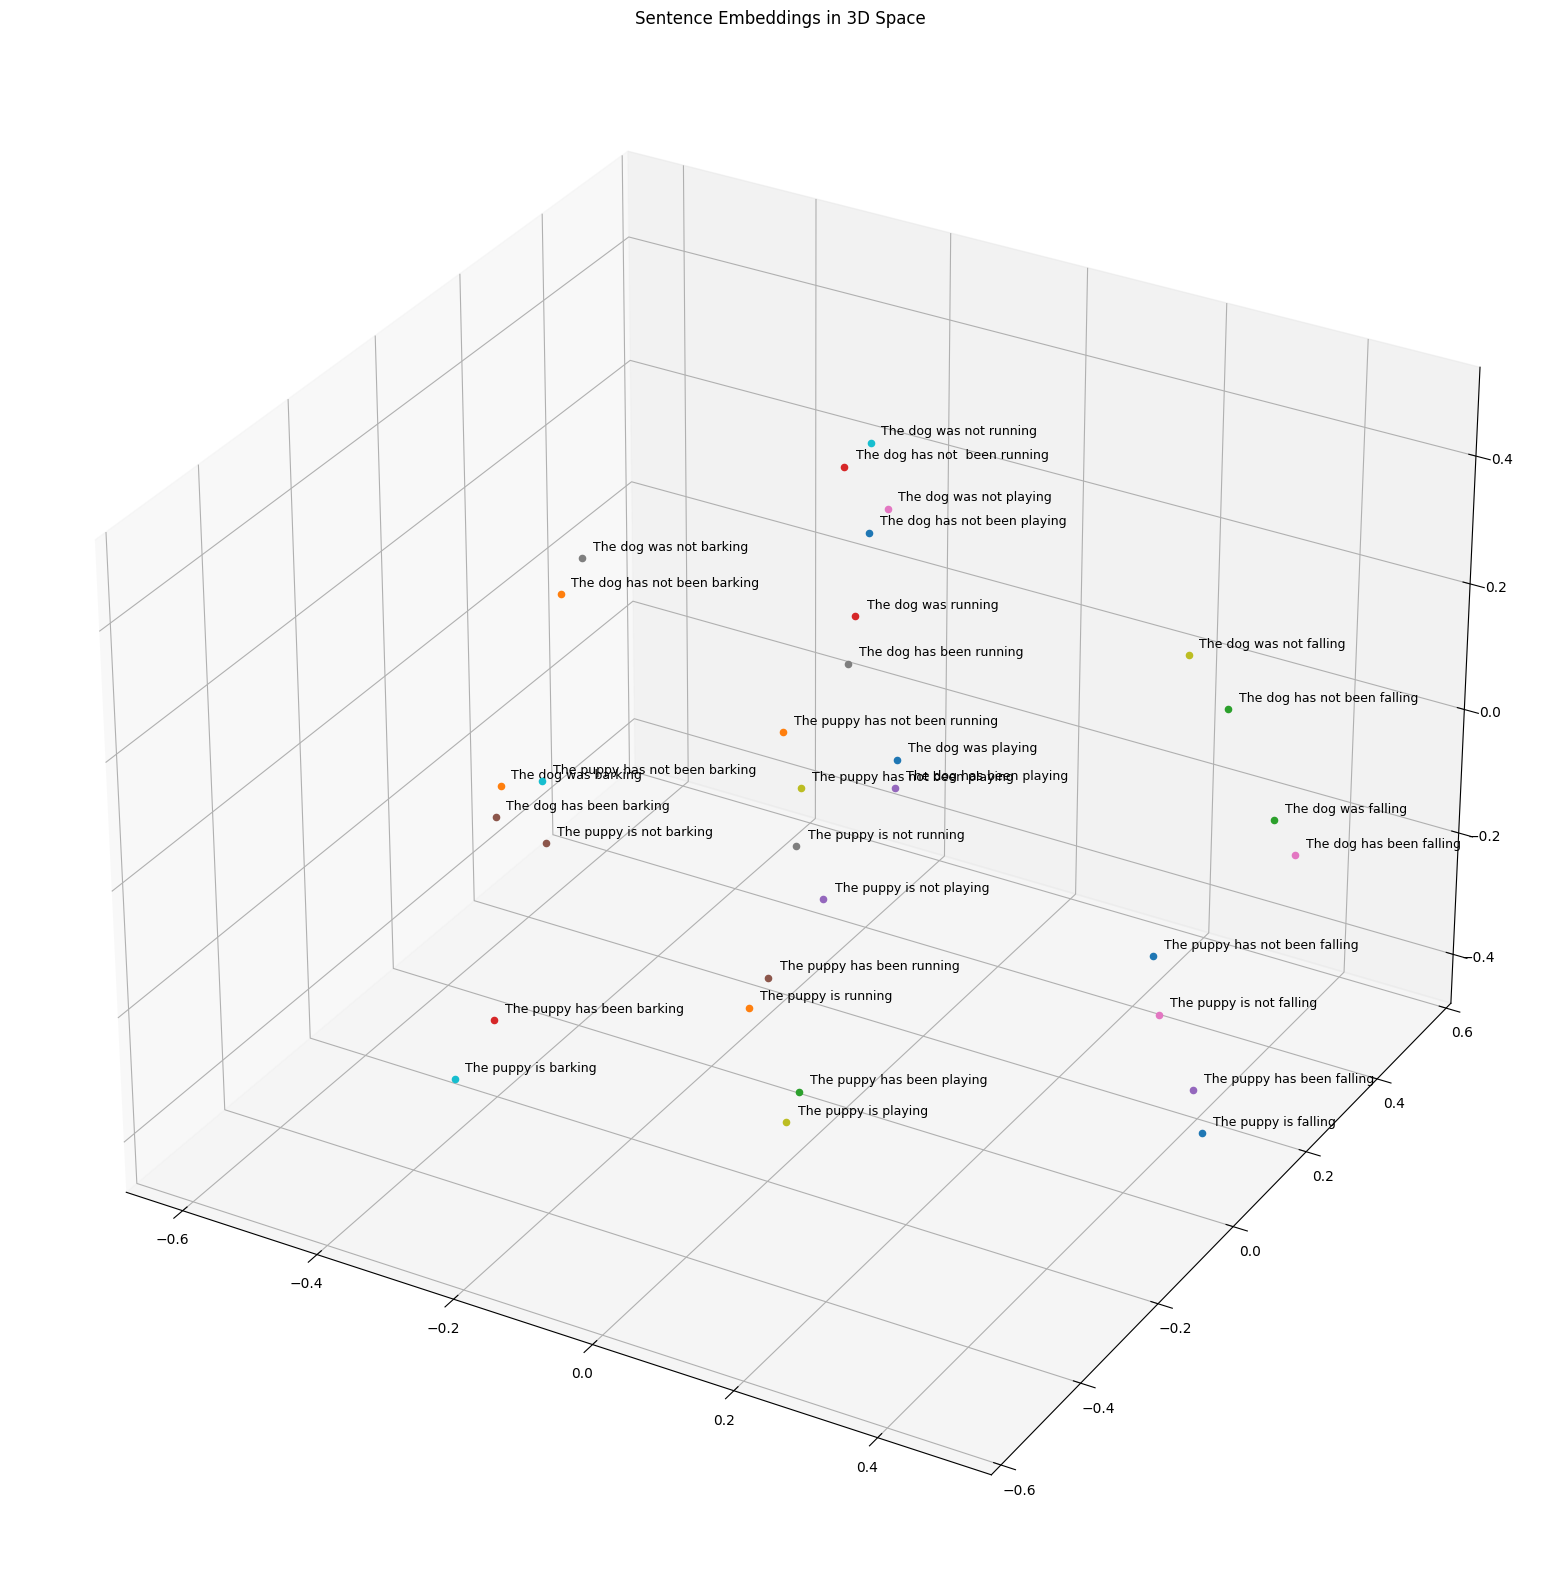


Analogy result: The dog has been running


In [ ]:
from sentence_transformers import SentenceTransformer, util
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sentences
sentences = [
    # "Bahubali killed Bhalaladeva",
    # "Bhalaladeva killed Bahubali",
    # "Bahubali is killing Bhalaladeva",
    # "Bhalaladeva is killing Bahubali",
    # "Bahubali is killed by Bhalaladeva",
    # "Bhalaladeva is killed by Bahubali",
    # "The Dog is playing",
    # "The Dog was playing",

    # "The Dog is barking",
    # "The Dog is falling",
    # "The Dog is running",
    # "The Dog a playing",
    # "The Dog a barking",
    # "The Dog a falling",
    # "Dog falling",
    # "The Dog is failing",
    # "The Dog a running",
    # "Them Dog playing",
    # "That Dog Playing",
    # "playing that dog was",
    # "Dog",

    "The dog was playing",
    "The dog was barking",
    "The dog was falling",
    "The dog was running",
    "The dog has been playing",
    "The dog has been barking",
    "The dog has been falling",
    "The dog has been running",
    "The puppy is playing",
    "The puppy is barking",
    "The puppy is falling",
    "The puppy is running",
    "The puppy has been playing",
    "The puppy has been barking",
    "The puppy has been falling",
    "The puppy has been running",
    "The dog was not playing",
    "The dog was not barking",
    "The dog was not falling",
    "The dog was not running",
    "The dog has not been playing",
    "The dog has not been barking",
    "The dog has not been falling",
    "The dog has not  been running",
    "The puppy is not playing",
    "The puppy is not barking",
    "The puppy is not falling",
    "The puppy is not running",
    "The puppy has not been playing",
    "The puppy has not been barking",
    "The puppy has not been falling",
    "The puppy has not been running",
    # "The cat is playing",
    # "The cat is barking",
    # "The cat is falling",
    # "The cat is running",
    # "The kitten is playing",
    # "The kitten is barking",
    # "The kitten is falling",
    # "The kitten is running",
]

# Embeddings
embeddings = model.encode(sentences, normalize_embeddings=True)

# Cosine similarity matrix
sim_df = pd.DataFrame(util.cos_sim(embeddings, embeddings).cpu().numpy(),
                      index=sentences, columns=sentences)
print("\nCosine Similarity Matrix:\n", sim_df.round(2))

# PCA to 3D
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
for i, sentence in enumerate(sentences):
    x, y, z = embeddings_3d[i]
    ax.scatter(x, y, z, marker='o')
    ax.text(x+0.01, y+0.01, z+0.01, sentence, fontsize=9)
ax.set_title("Sentence Embeddings in 3D Space")
plt.show()

# Analogy example
extra_sentences = ["The cat is playing", "The puppy is barking", "The boy is running"]
all_sentences = sentences + extra_sentences
all_emb = model.encode(all_sentences, normalize_embeddings=True)

result_vec = all_emb[0] - all_emb[1] + all_emb[3]
sims = util.cos_sim(result_vec, all_emb)[0]
best_idx = sims.argmax().item()

print("\nAnalogy result:", all_sentences[best_idx])
